In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
# Reading data into notebook
store_raw = pd.read_csv('BUSY.csv', usecols=[0])

In [3]:
matplotlib.style.use('ggplot')
store_raw.head(10)

,POS_Application_Name|STOREID|MACID|BILLNO|BARCODE|GUID|CREATED_STAMP|CAPTURED_WINDOW|UPDATE_STAMP
0,BUSY|DEL0000001446|counter1|counter1DEL0000001...
1,BUSY|DEL0000001446|counter1|counter1DEL0000001...
2,BUSY|DEL0000001446|counter1|counter1DEL0000001...
3,BUSY|DEL0000001446|counter1|counter1DEL0000001...
4,BUSY|DEL0000001446|counter1|counter1DEL0000001...
5,BUSY|DEL0000001446|counter1|counter1DEL0000001...
6,BUSY|DEL0000001446|counter1|counter1DEL0000001...
7,BUSY|DEL0000001446|counter1|counter1DEL0000001...
8,BUSY|DEL0000001446|counter1|counter1DEL0000001...
9,BUSY|DEL0000001446|counter1|counter1DEL0000001...


## Data Wrangling Phase



In [4]:
# foo = lambda x: pd.Series([i for i in reversed(x.split('|'))])
# rev = store_raw['POS_Application_Name, STOREID, MACID, BILLNO, BARCODE, GUID, CREATED_STAMP, CAPTURED_WINDOW, UPDATE_STAMP'].apply(foo)
# rev
initial = 'POS_Application_Name|STOREID|MACID|BILLNO|BARCODE|GUID|CREATED_STAMP|CAPTURED_WINDOW|UPDATE_STAMP'
store_raw = store_raw[initial].str.split('|', expand=True)

In [5]:
store = store_raw.drop([9,10,11,12,13,14,15,16], axis=1)

In [6]:
store.count()

0    462463
1    462463
2    462463
3    462463
4    462463
5    462463
6    462463
7    462463
8    462381
dtype: int64

In [7]:
store.dropna(inplace=True)
store.count()

0    462381
1    462381
2    462381
3    462381
4    462381
5    462381
6    462381
7    462381
8    462381
dtype: int64

In [8]:
store.columns = ['POS_Application_Name', 'STOREID','MACID','BILLNO','BARCODE','GUID','CREATED_STAMP','CAPTURED_WINDOW','UPDATE_STAMP']

## Exploration Phase

In this phase we will explore our data in more detail and extract out the analysis and prove them with the help of visualizations.

In [10]:
store.describe()

,POS_Application_Name,STOREID,MACID,BILLNO,BARCODE,GUID,CREATED_STAMP,CAPTURED_WINDOW,UPDATE_STAMP
count,462381,462381,462381,462381,462381,462381,462381,462381,462381
unique,1,5,15,32111,32690,462376,461553,668,461180
top,BUSY,DEL0000000103,counter1,Counter2DEL0000000103817,1,0,2017-01-11 22:50:20.155,NULL,Demo-15 User
freq,462381,342270,398236,3744,82820,4,4,421865,702


In [11]:
x = store.groupby(['STOREID'])['BARCODE'].count()
x

STOREID
DEL0000000103    342270
DEL0000001184     26307
DEL0000001446     63377
UPR0000001228       344
UPR0000002773     30083
Name: BARCODE, dtype: int64

In [95]:
str_mac = store.groupby(['STOREID', 'MACID'])['BARCODE'].count()
str_mac

STOREID        MACID   
DEL0000000103  23372129         1
               23942158         1
               24920107         1
               24971184         1
               Counter2      7357
               counter1    334909
DEL0000001184  COUNTER8      3526
               Counter1     20885
               Counter5      1896
DEL0000001446  24749329         1
               25107385         1
               25146601         1
               COUNTER8        18
               Counter5        29
               counter1     63327
UPR0000001228  Counter1         1
               Counter2        18
               Counter3        90
               counter2       235
UPR0000002773  Counter1     28243
               Counter2        74
               Counter3       584
               Counter4        87
               Counter5      1095
Name: BARCODE, dtype: int64

Populating the interactive namespace from numpy and matplotlib


[<matplotlib.text.Text at 0x29382d68>, <matplotlib.text.Text at 0x293638d0>]

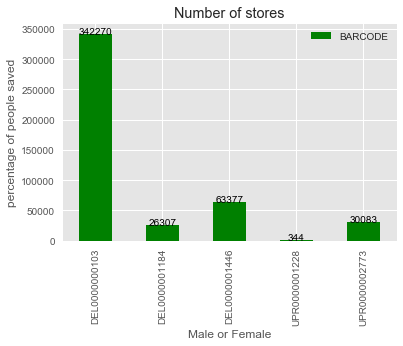

In [28]:
%pylab inline

ax = x.plot(kind='bar',
            title='Number of stores',
            grid=True,
            legend=True,
            color="green")
for i in range(0,len(x)):
    ax.text(i, x.iloc[i], x.iloc[i], color='black',ha='center')
    
ax.set(xlabel="Male or Female", ylabel="percentage of people saved")

In [13]:
y = store.groupby(['MACID'])['BARCODE'].count()
y

MACID
23372129         1
23942158         1
24749329         1
24920107         1
24971184         1
25107385         1
25146601         1
COUNTER8      3544
Counter1     49129
Counter2      7449
Counter3       674
Counter4        87
Counter5      3020
counter1    398236
counter2       235
Name: BARCODE, dtype: int64

In [14]:
z = y[y >= y.median()]
z = z[z < z.max()]    # Removing outlier
z

MACID
COUNTER8     3544
Counter1    49129
Counter2     7449
Counter3      674
Counter4       87
Counter5     3020
counter2      235
Name: BARCODE, dtype: int64

[<matplotlib.text.Text at 0x28632438>, <matplotlib.text.Text at 0x2802ebe0>]

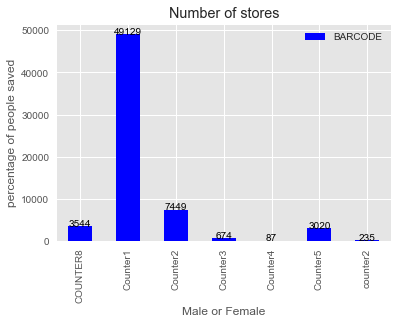

In [18]:
ax = z.plot(kind='bar',
            title='Number of stores',
            grid=True,
            legend=True,
            color="blue")
for i in range(0,len(z)):
    ax.text(i, z.iloc[i], z.iloc[i], color='black',ha='center')
    
ax.set(xlabel="Male or Female", ylabel="percentage of people saved")

In [97]:
one_product_per_bill = pd.concat(g for _, g in store.groupby("BILLNO") if len(g) == 1)
len(one_product_per_bill)

4245

In [78]:
more_than_one_bill = pd.concat(g for _, g in store.groupby("BILLNO") if len(g) > 1)
len(more_than_one_bill)

458136

In [89]:
bill_group = more_than_one_bill.groupby('BILLNO')['BARCODE'].count()
bill_group.describe()

count    27866.00000
mean        16.44068
std         31.09707
min          2.00000
25%          4.00000
50%          8.00000
75%         19.00000
max       3744.00000
Name: BARCODE, dtype: float64

In [90]:
bill_group.sort_values(inplace=True, ascending=False)

[<matplotlib.text.Text at 0x3ac50668>, <matplotlib.text.Text at 0x3abcec88>]

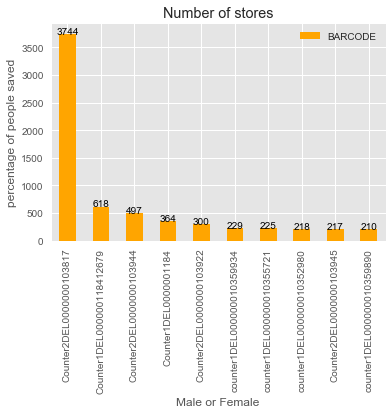

In [91]:
ax = bill_group.head(10).plot(kind='bar',
            title='Number of stores',
            grid=True,
            legend=True,
            color="orange")
for i in range(0,10):
    ax.text(i, bill_group.head(10).iloc[i], bill_group.head(10).iloc[i], color='black',ha='center')
    
ax.set(xlabel="Male or Female", ylabel="percentage of people saved")

In [101]:
more_than_one_barcode = pd.concat(g for _, g in store.groupby("BARCODE") if len(g) > 1)
len(more_than_one_barcode)
# Barcode can never be same, therefore these are the number of products on which offer was applied or were manual entries

441712